In [5]:
%matplotlib inline
import numpy as np
from scipy.interpolate import interp1d, BSpline, splrep
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from inspect import getmembers, isfunction
import pickle
plt.style.use('./../../../MW_viz/matplotlib.mplstyle')


In [8]:
DATAPATH = "../../data/"
halo = np.load(DATAPATH + "Halo719/Halo719_{:03d}.npy".format(220))
h = {'position': halo['x'], 'velocity': halo['v']}

In [28]:
with open('../../data/NICO_PICKLE/times.pickle', 'rb') as f:
    times =  pickle.load(f)
halos = list(times.keys())

with open('../../data/NICO_PICKLE/coeffs_0_dict.pickle', 'rb') as f:
    coeffs_0_dict = pickle.load(f)

with open('../../data/NICO_PICKLE/coeffs_1_dict.pickle', 'rb') as f:
    coeffs_1_dict =  pickle.load(f)

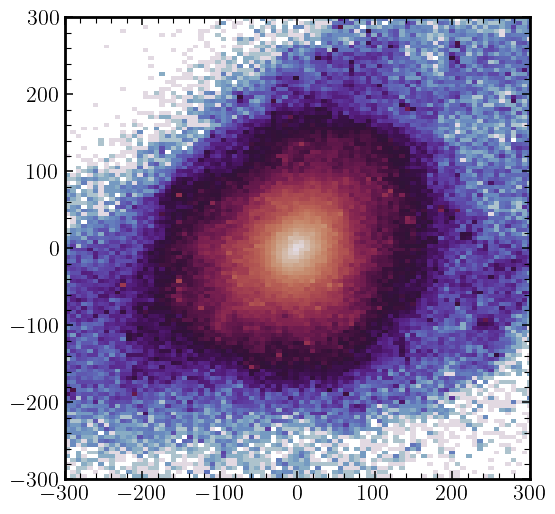

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.hist2d(h['position'][:,0], h['position'][:,1], bins=200, norm=LogNorm(), cmap='twilight');
ax.set_xlim(-300, 300)
ax.set_ylim(-300, 300)
plt.Circle((0,0), 300, color='w', ls='--')
plt.show()

In [29]:
def enclosed_mass(halo, snap):
    DATAPATH = "../../data/"
    halo = np.load(DATAPATH + "{}/{}_{:03d}.npy".format(halo, halo, snap))
    h = {'position': halo['x'], 'velocity': halo['v']}
    mp = 402830.0 # Msun 
    Menc = len(np.where(norm(h['position'], axis=1) < 150)[0] )
    return Menc*mp

In [37]:
def halo_COM(pos):
    rhalo = np.sqrt(np.sum(pos**2, axis=1))
    rcut = np.where((rhalo<150) & (rhalo>50))
    xcom, ycom, zcom  = np.mean(pos[rcut], axis=0)
    return np.sqrt(xcom**2 + ycom**2 + zcom**2)

In [31]:
halos_init_snap = {'Halo004':243-25 , 'Halo113':243-26 , 'Halo169':243-31 , 'Halo170':243-28 , 'Halo222':243-24, 'Halo229':240-81, 
                    'Halo282':243-23 , 'Halo327':243-33,  'Halo349':243-36, 'Halo407':243-25, 'Halo659':243-74, 'Halo666':243-27,
                    'Halo719':243-25, 'Halo747':243-27, 'Halo756':243-27, 'Halo788':235-19, 'Halo975':235-18, 'Halo983':235-18 }

In [33]:
halos[0]

'Halo004'

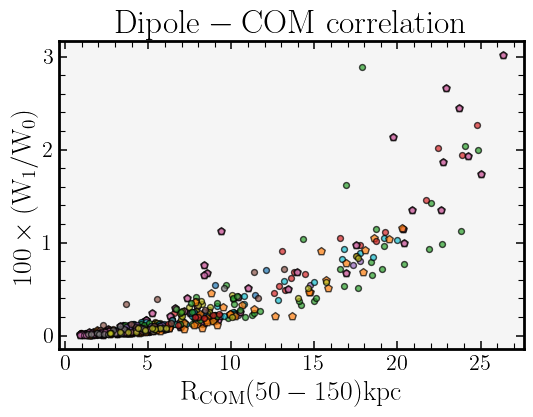

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
for h in halos:
    rcom_all = []
    nsnaps = len(times[h])
    j=0
    snap = halos_init_snap[h]+j
    for j in range(nsnaps):
        snap = halos_init_snap[h]+j
        halo = np.load(DATAPATH + "{}/{}_{:03d}.npy".format(h, h, snap))
        pos = halo['x']
        rcom =  halo_COM(pos)
        rcom_all.append(rcom)

    if h == 'Halo229':
        ax.scatter(rcom_all, (coeffs_1_dict[h]/coeffs_0_dict[h])*100, s=32, label=h, edgecolors='k', alpha=0.7, marker='p')
    if h == 'Halo659':
        ax.scatter(rcom_all, (coeffs_1_dict[h]/coeffs_0_dict[h])*100, s=32, label=h, edgecolors='k', alpha=0.7, marker='p')
    else:
        ax.scatter(rcom_all, (coeffs_1_dict[h]/coeffs_0_dict[h])*100, s=18, label=h, edgecolors='k', alpha=0.7)
    j=0

ax.set_xlabel(r'$\rm{R_{COM}(50-150) kpc}$')
ax.set_ylabel(r'$100 \times \rm{(W_{1}/W_0)}$')
plt.title(r'$\rm{Dipole-COM\ correlation}$')

ax.set_facecolor('whitesmoke')
plt.savefig('dipole_com_correlation.png', bbox_inches='tight')
plt.savefig('dipole_com_correlation.pdf', bbox_inches='tight')

plt.show()


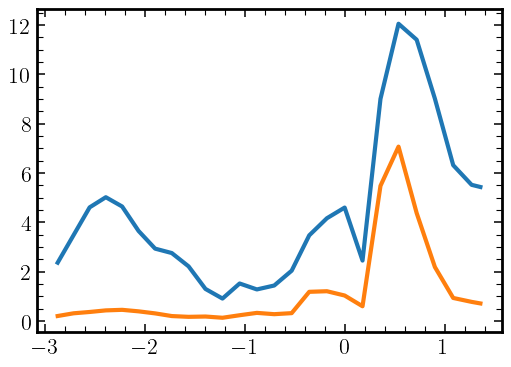

In [47]:
plt.plot(times[h], rcom_all)
plt.plot(times[h], (coeffs_1_dict[h]/coeffs_0_dict[h])*1000)
plt.show()

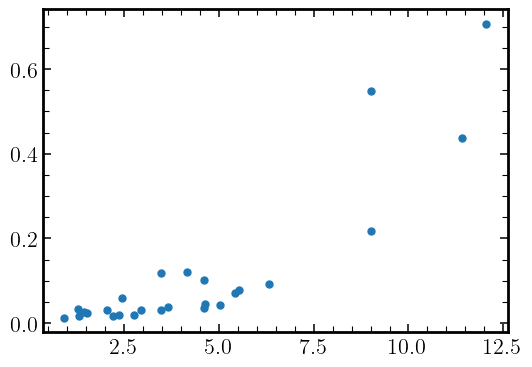

In [16]:
np.mean(h['position'][rcut], axis=0)

array([-0.7267955, -2.0399246,  2.0329192], dtype=float32)

In [ ]:
with open('../../data/NICO_PICKLE/times.pickle', 'rb') as f:
    times =  pickle.load(f)
